In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.describe(include='all')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


LinAlgError: singular matrix

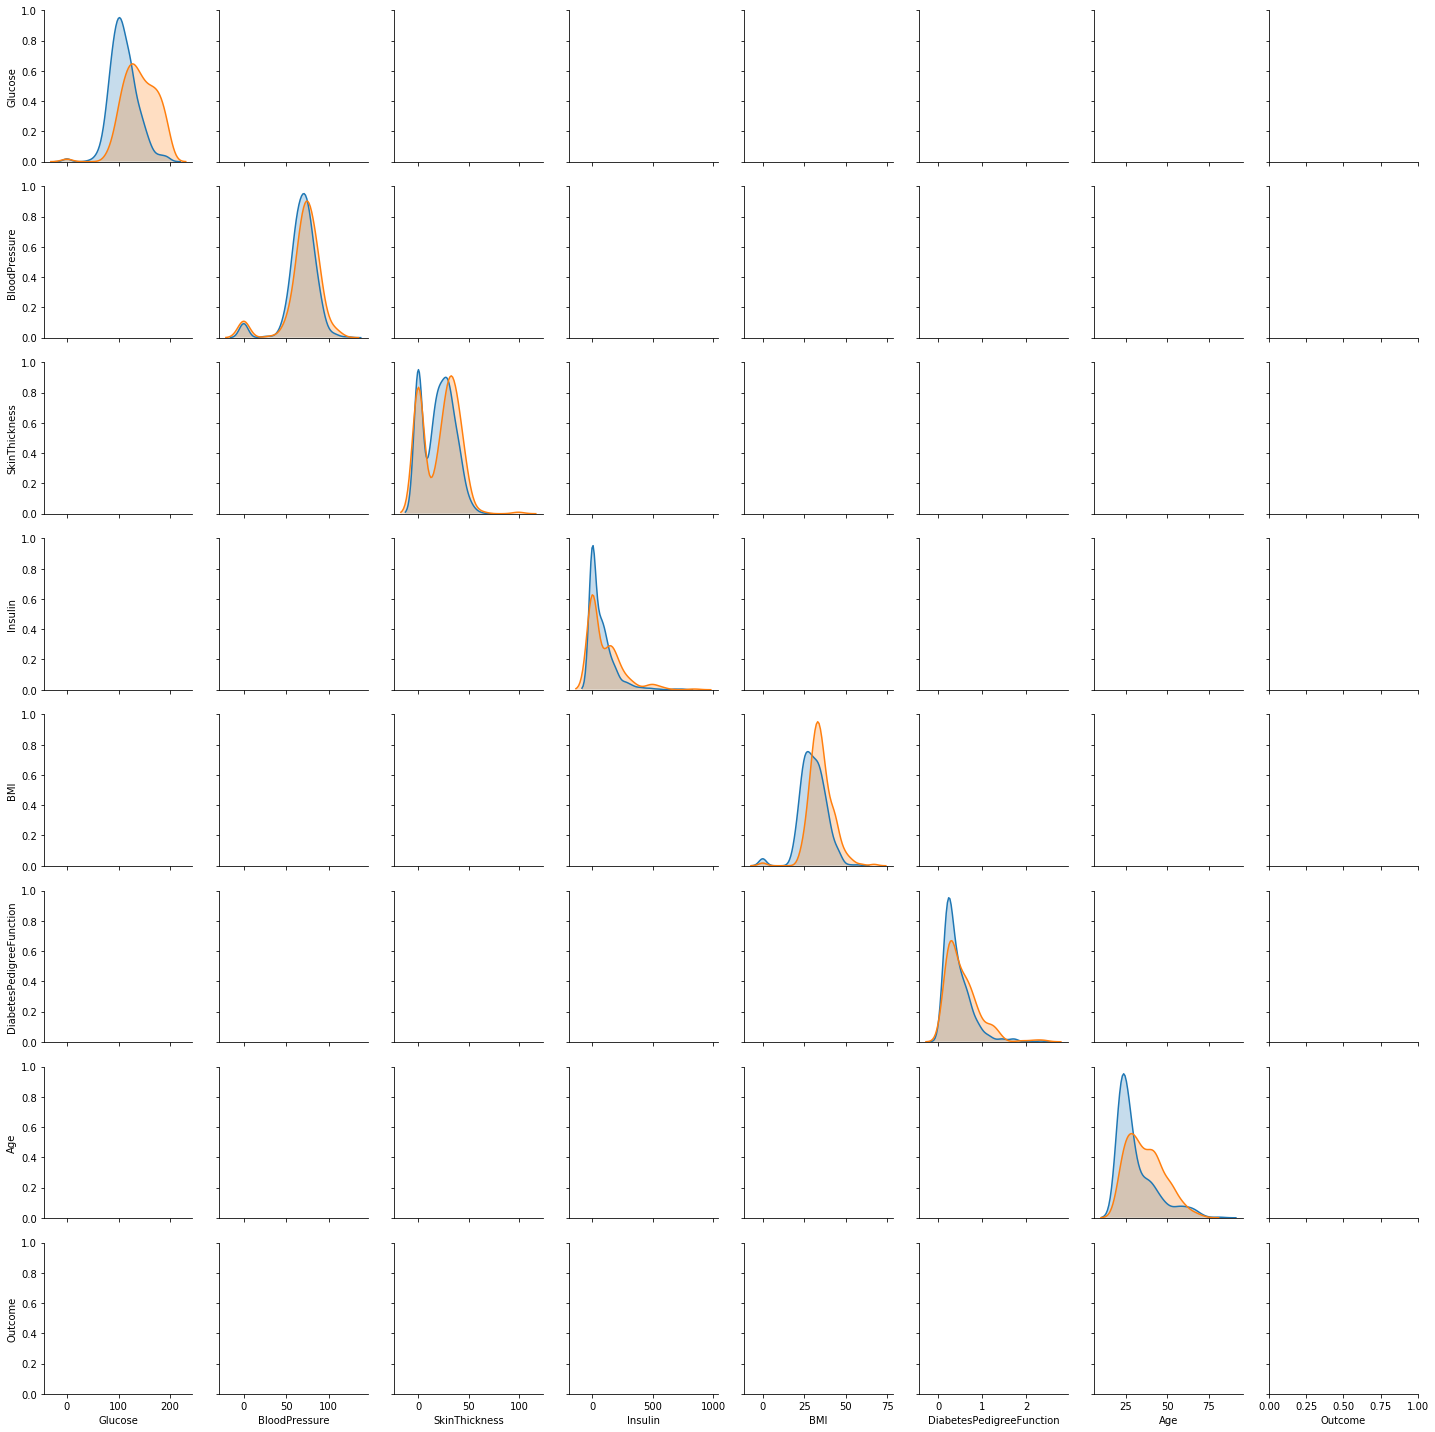

In [12]:
sns.pairplot(dataset, hue='Outcome')

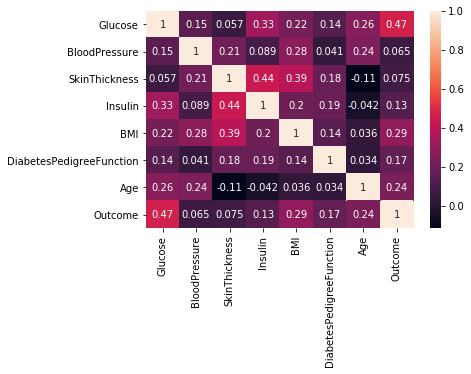

In [13]:
sns.heatmap(dataset.corr(), annot=True)

In [14]:
# creating input features and target variables
X= dataset.iloc[:,0:7]
y= dataset.iloc[:,7:]

In [15]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [16]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.94372388, -0.26394125, -1.28821221, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- We are using keras to build our neural network. We import the keras library to create the neural network layers.
- There are two main types of models available in keras — Sequential and Model. we will use Sequential model to build our neural network.
- We use Dense library to build input, hidden and output layers of a neural network.

In [18]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


AttributeError: module 'tensorflow.python.keras.backend' has no attribute 'get_graph'

- We have 7 input features and one target variable. 2 Hidden layers. Each hidden layer will have 4 nodes.
- ReLu will be the activation function for hidden layers. As this is a binary classification problem we will use sigmoid as the activation function.
- Dense layer implements
#### output = activation(dot(input, kernel) + bias)
- kernel is the weight matrix. kernel initialization defines the way to set the initial random weights of Keras layers.
- Random normal initializer generates tensors with a normal distribution.
- For uniform distribution, we can use Random uniform initializers.
- Keras provides multiple initializers for both kernel or weights as well as for bias units

<img src='img1.jpg' height=300 width=500>

In [19]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=7))

NameError: name 'Sequential' is not defined

In [20]:
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

NameError: name 'classifier' is not defined

In [35]:
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

- Once the different layers are created we now compile the neural network.
- As this is a binary classification problem, we use binary_crossentropy to calculate the loss function between the actual output and the predicted output.
- To optimize our neural network we use Adam. Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.
- Momentum takes the past gradients into account in order to smooth out the gradient descent.
- we use accuracy as the metrics to measure the performance of the model

In [36]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

- we now fit out training data to the model we created. we use a batch_size of 10. This implies that we use 10 samples per gradient update.
- We iterate over 100 epochs to train the model. An epoch is an iteration over the entire data set.

In [37]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
537/537 [==============================] - 0s 701us/step - loss: 0.6901 - acc: 0.6611
Epoch 2/100
537/537 [==============================] - 0s 243us/step - loss: 0.6821 - acc: 0.6611
Epoch 3/100
537/537 [==============================] - 0s 241us/step - loss: 0.6681 - acc: 0.6611
Epoch 4/100
537/537 [==============================] - 0s 245us/step - loss: 0.6378 - acc: 0.6611
Epoch 5/100
537/537 [==============================] - 0s 243us/step - loss: 0.5930 - acc: 0.6685
Epoch 6/100
537/537 [==============================] - 0s 253us/step - loss: 0.5491 - acc: 0.7412
Epoch 7/100
537/537 [==============================] - 0s 251us/step - loss: 0.5179 - acc: 0.7728
Epoch 8/100
537/537 [==============================] - 0s 245us/step - loss: 0.4986 - acc: 0.7784
Epoch 9/100
537/537 [==============================] - 0s 245us/step - loss: 0.4864 - acc: 0.7765
Epoch 10/100
537/537 [==============================] - 0s 247us/step - loss: 0.4796 - acc: 0.7803
Epoch 11/100
537/53

##### We can also evaluate the loss value & metrics values for the model in test mode using evaluate function

- Loss and accuracy of the mode;

In [38]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

537/537 [==============================] - 0s 101us/step


[0.44100656078736433, 0.7858473005907496]

####  We now predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [39]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [41]:
X_test.shape

(231, 7)

### Now is the moment of truth. we check the accuracy on the test dataset

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129  16]
 [ 40  46]]


- total of true positive and true negative is 179 out 231 observations in the test dataset. so our accuracy for test dataset is around 78%.
- With the given inputs we can predict with a 78% accuracy if the person will have diabetes or not

### Make your own prediction 

In [54]:
X_train[0:1]

array([[1.72464386, 0.87340925, 0.40544544, 0.66164119, 0.165937  ,
        2.06009452, 1.59617091]])

In [61]:
x_new= np.array([[1.72464386, 0.87340925, 0.40544544, 0.66164119, 0.165937,2.06009452, 1.59617091]])
#x_new= sc.inverse_transform(x_new)
#x_new
my_pred=classifier.predict(x_new)
my_pred

array([[0.7557104]], dtype=float32)